# Implementing Deep Learning Models with Pytorch

## Simple Examples with MNIST

## Feed Forward NN

In [1]:
#!pip install torch

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [5]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())


In [6]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [7]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.3147
Epoch [1/5], Step [200/600], Loss: 0.1987
Epoch [1/5], Step [300/600], Loss: 0.2254
Epoch [1/5], Step [400/600], Loss: 0.2082
Epoch [1/5], Step [500/600], Loss: 0.2227


In [9]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 97.69 %


In [11]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [12]:
device

device(type='cpu')

In [10]:
import matplotlib.pyplot as plt


tensor(9)


tensor([[ -6.4029, -13.6164,  -6.6096,   0.2275,  -5.1154,  -8.5581, -13.3805,
          -0.7737,  -3.6062,  11.4983]], grad_fn=<AddmmBackward0>)

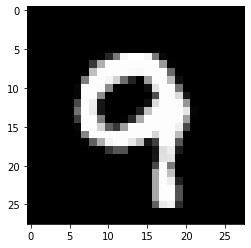

In [12]:
one_batch = next(iter(test_loader))
k = 99
one_image = one_batch[0][k]
one_label = one_batch[1][k]

one_image_npy = one_image.squeeze().numpy()
plt.imshow(one_image_npy, cmap='gray')

image = one_image.reshape(1,28*28).to(device)
label = one_label.to(device)
print(one_label)
model(image)